# ____________________________________________________________________

## TASK 2: Data preparetion and analysis

This tasks consists of data pre-processing and data analysis. Some of the pre-processing is done in task 1 like expanding the nested dictionaries. Some other pre-processing like filtering of un-required features will take place in this task. The analysis of the data in terms of bar graphs will be done in the later part of this program.

### DATA PREPARETION:

In [675]:
# importing some required libraries

import csv # library to work with csv files format
import pandas as pd # library to convert raw data in to tabular data or data frame
from matplotlib import pyplot as plt # for plotting graphs
import folium # to work with the world map
from folium.plugins import HeatMap # for drawing the heat map

In [676]:
df = pd.read_csv('bike.csv') # reading the csv file

In [677]:
df.info() # checking important information like non-null value counts and data types of the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             615 non-null    object 
 1   href                615 non-null    object 
 2   ID                  615 non-null    object 
 3   Location_City       615 non-null    object 
 4   Location_Country    615 non-null    object 
 5   Location_Longitude  615 non-null    float64
 6   Location_Latitude   615 non-null    float64
 7   Name                615 non-null    object 
 8   Source              158 non-null    object 
 9   gbfs_href           103 non-null    object 
 10  License_name        27 non-null     object 
 11  License_url         27 non-null     object 
 12  ebikes              24 non-null     object 
dtypes: float64(2), object(11)
memory usage: 62.6+ KB


Deleting the useless data like urls from the data set as they don't provide any qualitative or quantitative data analysis.

In [678]:
# removing href, source, gbfs_href and License_url feature
df = df.drop("href", axis=1) 
df = df.drop("Source", axis=1)
df = df.drop("gbfs_href", axis=1)
df = df.drop("License_url", axis=1)

In [679]:
df.head(10) # checking data structure after removing some features

,Company,ID,Location_City,Location_Country,Location_Longitude,Location_Latitude,Name,License_name,ebikes
0,['ЗАО «СитиБайк»'],velobike-moscow,Moscow,RU,37.616667,55.750000,Velobike,NaN,NaN
1,['Urban Infrastructure Partner'],baerum-bysykkel,Bærum,NO,10.546343,59.894550,Bysykkel,NaN,NaN
2,['Comunicare S.r.l.'],bicincitta-siena,Siena,IT,11.330600,43.318600,Bicincittà,NaN,NaN
3,['Cyclopolis Systems'],cyclopolis-maroussi,Maroussi,GR,23.808330,38.056872,Cyclopolis,NaN,NaN
4,"['Groundwork', 'Slough Borough Council', 'ITS']",cycle-hire-slough,Slough,GB,-0.591562,51.511350,Cycle Hire,NaN,NaN
5,['Cyclopolis Systems'],cyclopolis-nafplio,Nafplio,GR,22.809340,37.563940,Cyclopolis,NaN,NaN
6,['Comunicare S.r.l.'],bicincitta-parco-dei-colli-di-bergamo,Parco dei Colli di Bergamo,IT,9.649230,45.722956,Bicincittà,NaN,NaN
7,['Cyclopolis Systems'],cyclopolis-aigialeia,Aigialeia,GR,22.082157,38.251110,Cyclopolis,NaN,NaN
8,['Cyclopolis Systems'],cyclopolis-marathon,Marathon,GR,23.977639,38.085568,Cyclopolis,NaN,NaN
9,['Comunicare S.r.l.'],bicincitta-mantova,Mantova,IT,10.783719,45.158664,Bicincittà,NaN,NaN


In [680]:
df.info() # checking important info after removing the unrequired features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             615 non-null    object 
 1   ID                  615 non-null    object 
 2   Location_City       615 non-null    object 
 3   Location_Country    615 non-null    object 
 4   Location_Longitude  615 non-null    float64
 5   Location_Latitude   615 non-null    float64
 6   Name                615 non-null    object 
 7   License_name        27 non-null     object 
 8   ebikes              24 non-null     object 
dtypes: float64(2), object(7)
memory usage: 43.4+ KB


In [681]:
df.isnull().sum() # checking the sum of null values for each column in the data set

Company                 0
ID                      0
Location_City           0
Location_Country        0
Location_Longitude      0
Location_Latitude       0
Name                    0
License_name          588
ebikes                591
dtype: int64

The results above shows that there is some data which is null. There are some classifiers for machine learning which do not accept the incomplete data that's why we need to complete this data set. So, all the null data was substituted with empty string. We can put any value depending on the type of data present in that column. In our case the null values are in object data types so empty string value was put in place of null values.

In [682]:
df = df.fillna(value="") # filling the all the null values with empty string to complete the data set
df.isnull().sum() # checking the info of our data after completing the data set.

Company               0
ID                    0
Location_City         0
Location_Country      0
Location_Longitude    0
Location_Latitude     0
Name                  0
License_name          0
ebikes                0
dtype: int64

In [683]:
# now checking the complete data set
df.head(10) # printing the starting 10 values to see the table structure

,Company,ID,Location_City,Location_Country,Location_Longitude,Location_Latitude,Name,License_name,ebikes
0,['ЗАО «СитиБайк»'],velobike-moscow,Moscow,RU,37.616667,55.750000,Velobike,,
1,['Urban Infrastructure Partner'],baerum-bysykkel,Bærum,NO,10.546343,59.894550,Bysykkel,,
2,['Comunicare S.r.l.'],bicincitta-siena,Siena,IT,11.330600,43.318600,Bicincittà,,
3,['Cyclopolis Systems'],cyclopolis-maroussi,Maroussi,GR,23.808330,38.056872,Cyclopolis,,
4,"['Groundwork', 'Slough Borough Council', 'ITS']",cycle-hire-slough,Slough,GB,-0.591562,51.511350,Cycle Hire,,
5,['Cyclopolis Systems'],cyclopolis-nafplio,Nafplio,GR,22.809340,37.563940,Cyclopolis,,
6,['Comunicare S.r.l.'],bicincitta-parco-dei-colli-di-bergamo,Parco dei Colli di Bergamo,IT,9.649230,45.722956,Bicincittà,,
7,['Cyclopolis Systems'],cyclopolis-aigialeia,Aigialeia,GR,22.082157,38.251110,Cyclopolis,,
8,['Cyclopolis Systems'],cyclopolis-marathon,Marathon,GR,23.977639,38.085568,Cyclopolis,,
9,['Comunicare S.r.l.'],bicincitta-mantova,Mantova,IT,10.783719,45.158664,Bicincittà,,


The above results shows that now there is no null value (NaN) for any column in our data. All the null values are substituted with empty string.

The data pre-processing and filtering is done. Now we will look into some analysis of the data

### DATA ANALYSIS

The data was extracted according to the country in which the bikes are parked and the number of bikes parked in that country. This data is then plotted in horizontal bar graph.


In [684]:
bikes_in_country = df['Location_Country'].value_counts() # checking the number of bikes in each country
bikes_in_country.info() # checking the information about the number of countries in which the bikes are parked

<class 'pandas.core.series.Series'>
Index: 52 entries, IT to IL
Series name: Location_Country
Non-Null Count  Dtype
--------------  -----
52 non-null     int64
dtypes: int64(1)
memory usage: 832.0+ bytes


The results above shows that there are 52 countries in total in which the bikes are parked.

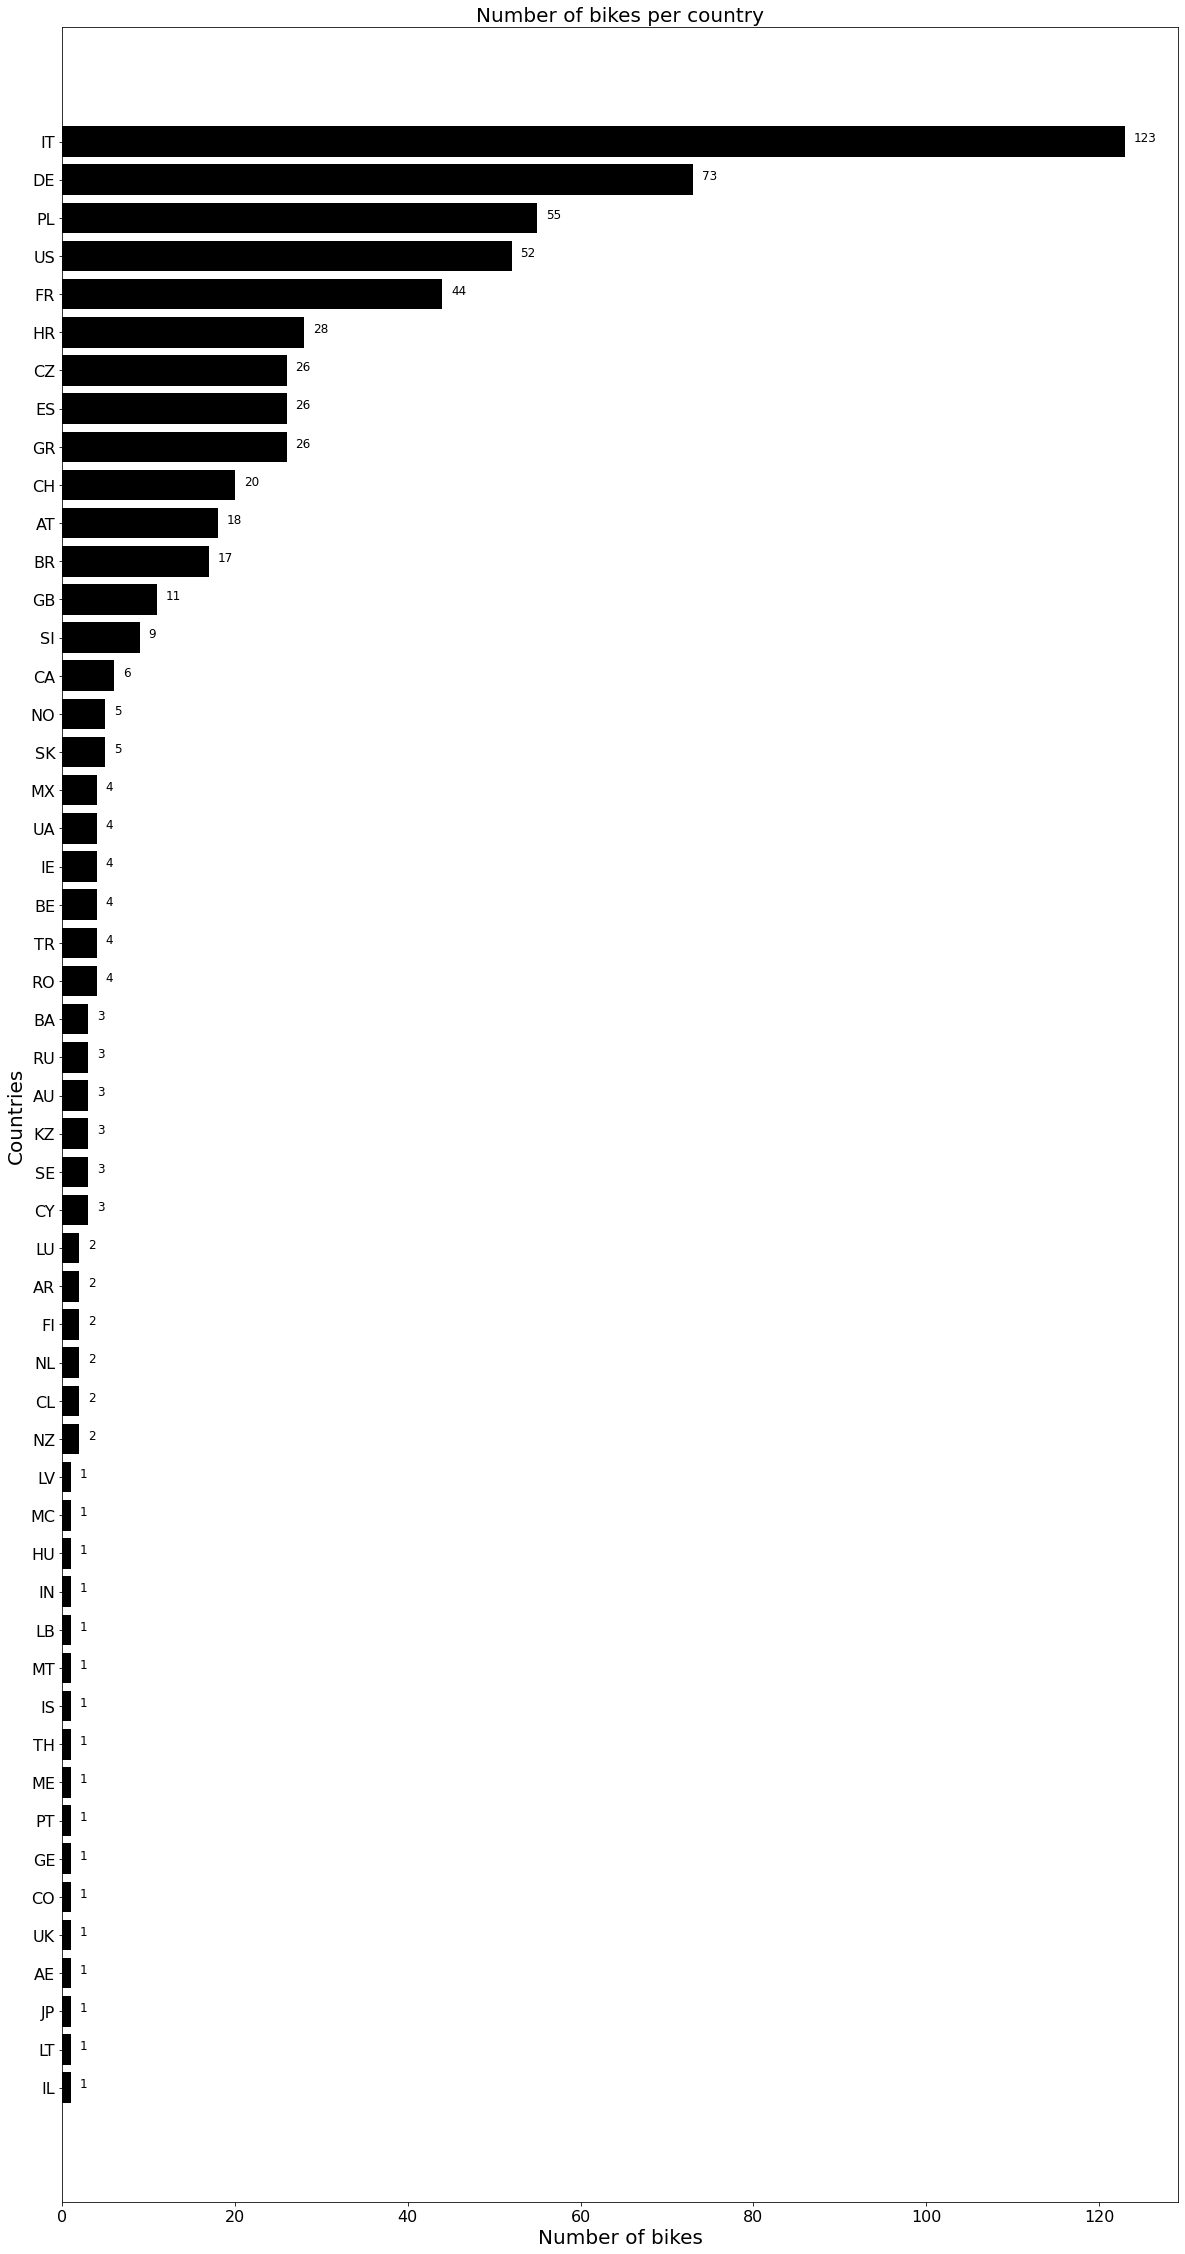

In [685]:
# plotting the bike counts againsts the countries

plt.figure(figsize = (20,40)) # for figure size, I chose bigger y-axis value of figure because the graph is horizontal bar graph
plt.barh(bikes_in_country.index, bikes_in_country.values, color='black') # plotting x-axis(country names) against y-axis (bike counts) with graph color black
plt.gca().invert_yaxis() # inverting y-axis value so that the biggest values comes first in the graph.
plt.xlabel('Number of bikes', fontsize=20) # setting the x-axis label with bigger font size
plt.ylabel('Countries', fontsize=20) # setting the y-axis label with bigger font size
plt.title('Number of bikes per country', fontsize=20) # setting the title of the graph
plt.xticks(fontsize=16); # increasing the x-axis values size
plt.yticks(fontsize=16); # increasing the y-axis values size
for i, v in enumerate(bikes_in_country.values): # writing values counts on the bars
    plt.text(v + 1, i, str(v), fontsize=12)

The results above shows there are total of 52 countries which the bikes parked. Italy has the highest number of bikes i.e., 123/615 bikes followed by Denmark which has 73/615 bikes and the rest of the 50 countries have lower number of bikes. 

Now the data of companies was extracted from the data set which shows the name of all the companies and the number of bikes produced by each company. This data is then plotted into the horizontal bar graph.


In [686]:
bike_companies = df['Company'].value_counts() # checking the number of bikes for each company
bike_companies.info() # checking the information about the number of companies that produce bikes

<class 'pandas.core.series.Series'>
Index: 87 entries, ['Nextbike GmbH'] to ['Donkey Republic']
Series name: Company
Non-Null Count  Dtype
--------------  -----
87 non-null     int64
dtypes: int64(1)
memory usage: 1.4+ KB


The data above shows that there are 87 companies in our data set which produced bikes.

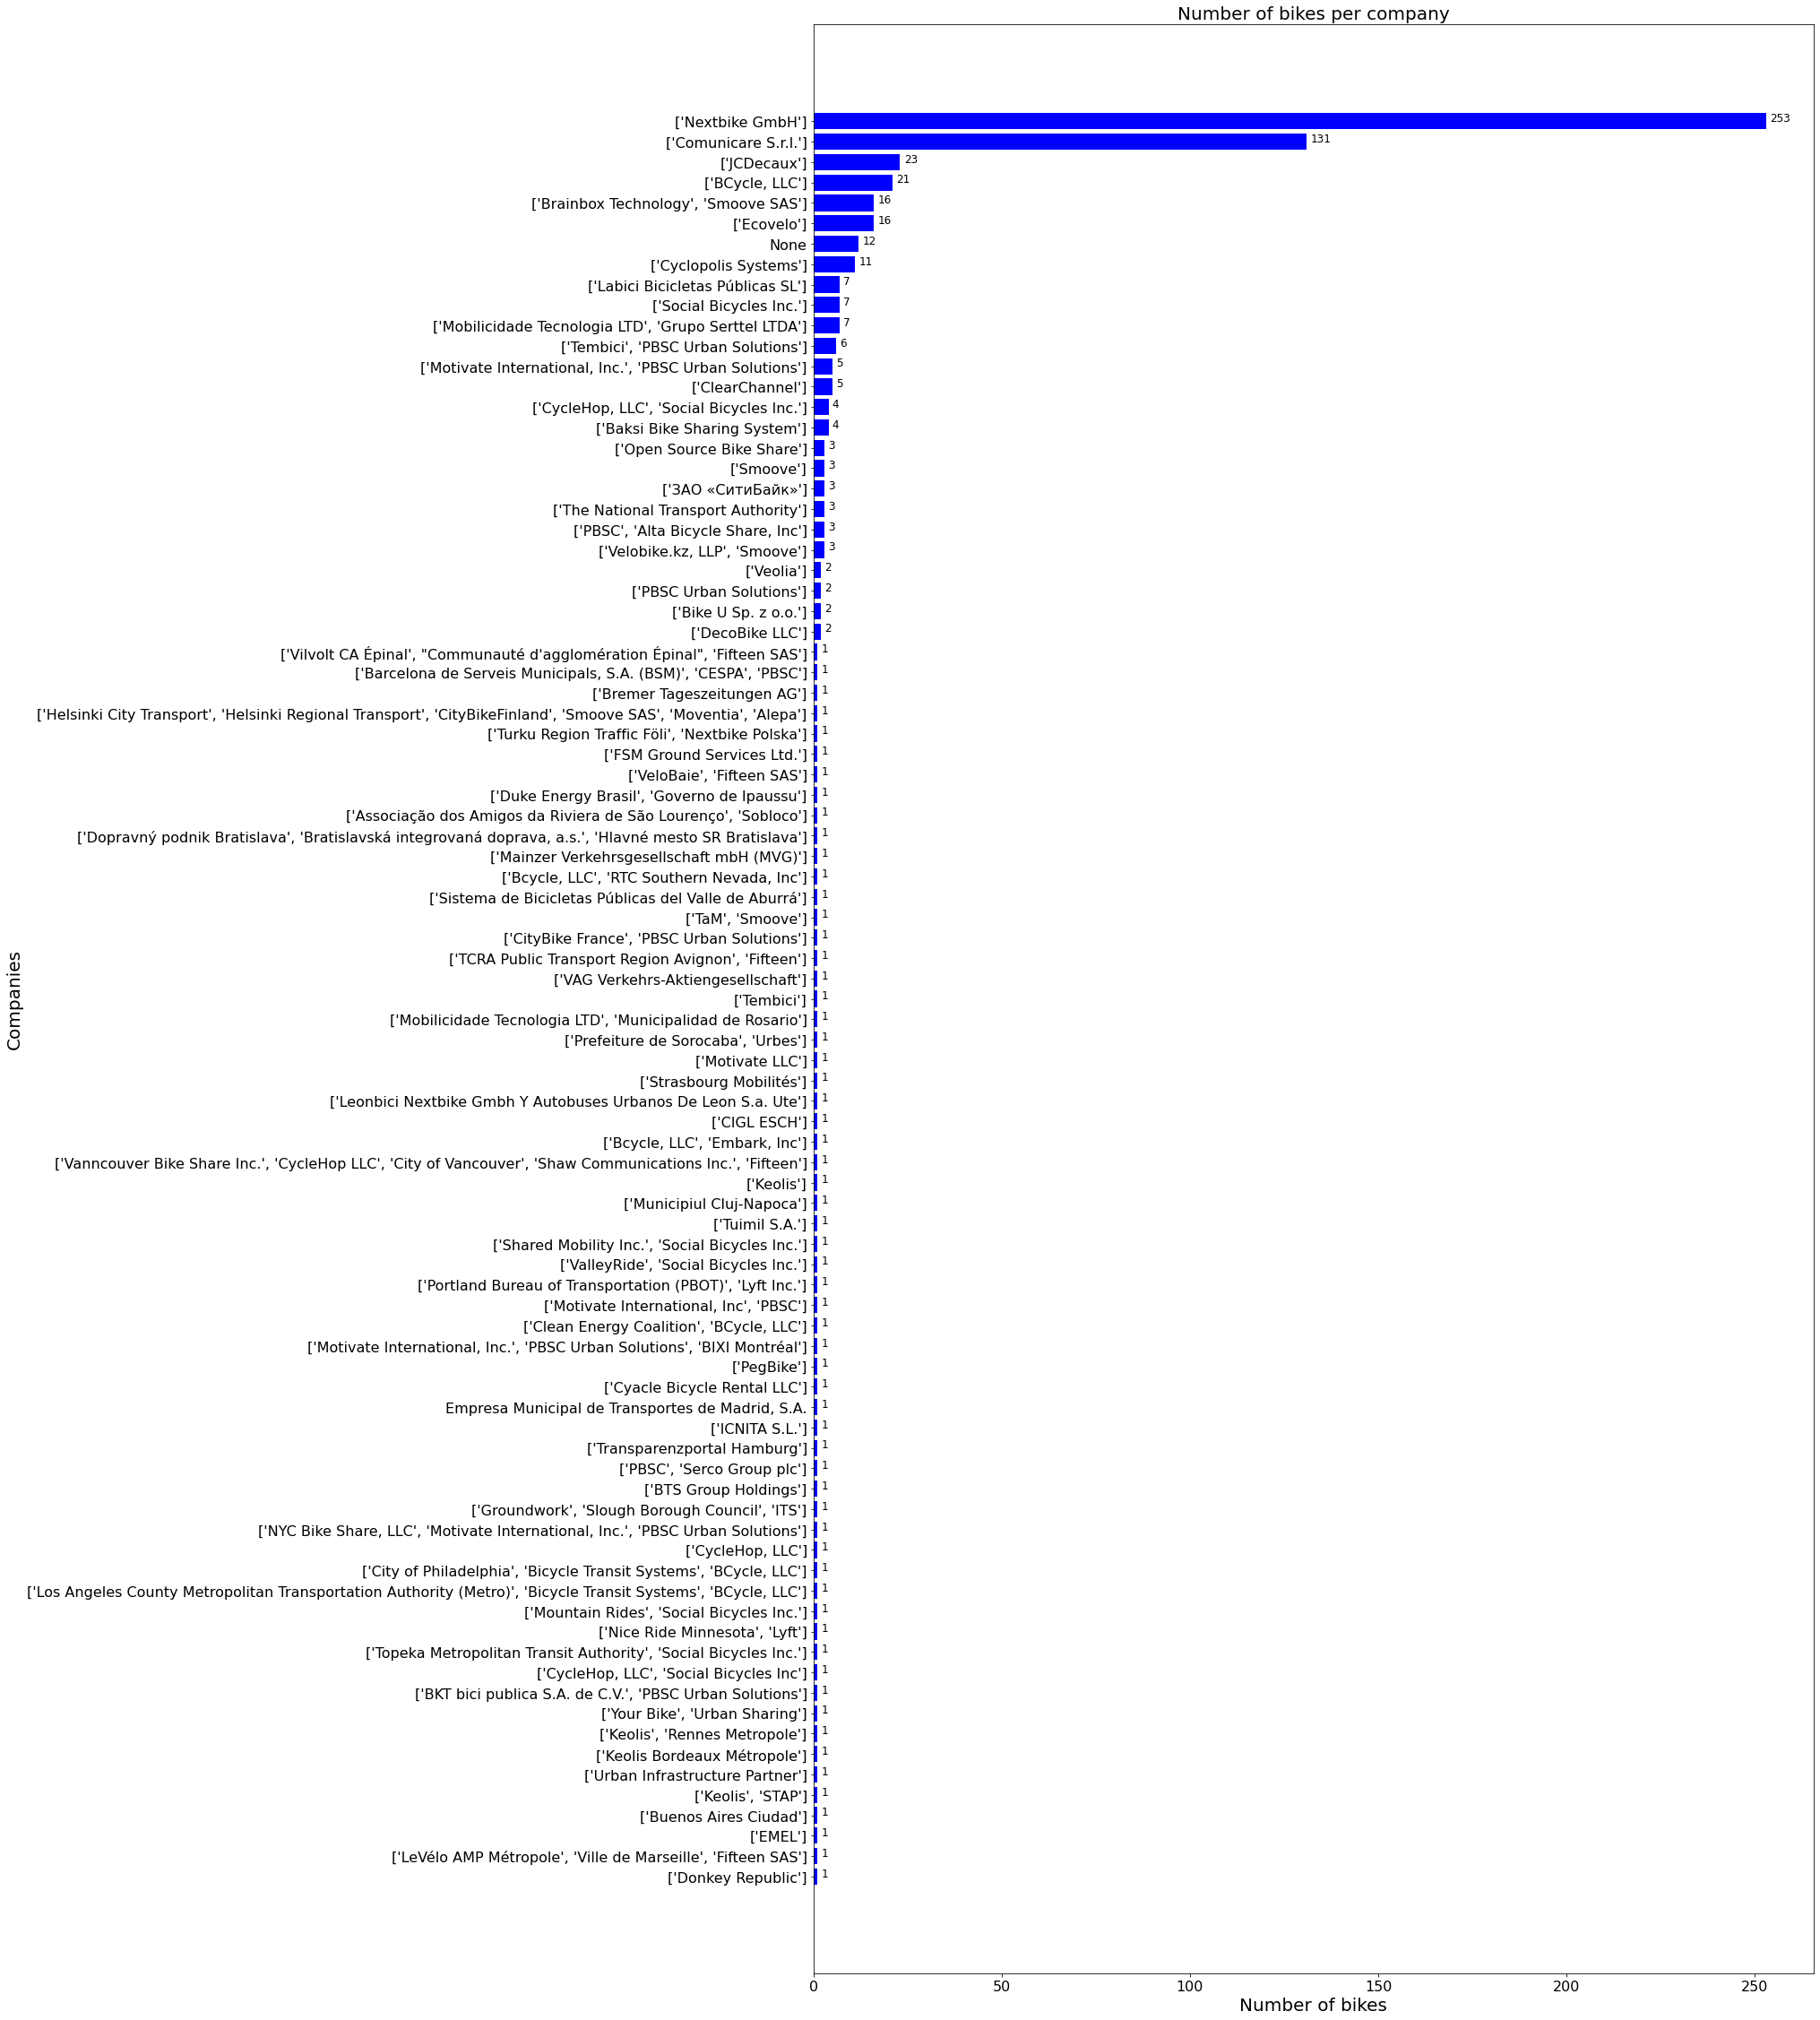

In [687]:
# plotting the bike counts againsts the companies

plt.figure(figsize = (20,40))
bike_companies = df['Company'].value_counts()
plt.barh(bike_companies.index, bike_companies.values, color='blue')
plt.gca().invert_yaxis()
plt.xlabel('Number of bikes', fontsize=20)
plt.ylabel('Companies', fontsize=20)
plt.title('Number of bikes per company', fontsize=20)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
for i, v in enumerate(bike_companies.values):
    plt.text(v + 1, i, str(v), fontsize=12)

The results above shows there are total of 86 companies (not 87) which produced the bikes. The 7th row shows the company name as "None" which that the company names of these 12 bikes are unknown. 
Nextbike GmbH is the companies with most number of bikes i.e., 253/615 bikes followed by Comunicare S.r.I which has 131/615 bikes and the rest of the 84 companies have lower number of bikes. 

Now the heat map layer was overlayed on the world map with the help on longitude and latitude value in our data set to analyze the concentration of bike in different parts of the world.

In [688]:
world_longitude = df.iloc[:,4].values # extracting longitude location of full data set
world_latitude = df.iloc[:,5].values # extracting latitude location of full data set

world_loc = [] # location list containing many lists. Each list contains one longitude and one latitude value
for j in range(len(world_longitude)):
    w_loc_temp = [] # initiating temporary list
    w_loc_temp.append(world_latitude[j]) # adding one latitude value in temporary list
    w_loc_temp.append(world_longitude[j]) # adding one longitude value in temporary list 
    world_loc.append(w_loc_temp) # appending the temporary list in the final location list
    
# print(world_loc)

In [689]:
# Creating a heat map centered on the given latitude and longitude
world_map = folium.Map(location=[0,0], zoom_start=2) # here the map is centered on the centre of the world (longitude = 0, latitude = 0)
heat_map_layer_world = HeatMap(world_loc, min_opacity=0.2, radius=15) # making heat map layer on the world map
heat_map_layer_world.add_to(world_map) # overlaying heat map layer over world map
   
# Show the map
world_map

The map above shows the concentration of bikes according to data set in all over the world. It shows that the Europe has most number of bikes parked especially in middle and western Europe.

Now, I tried to extract the data for a particular country and checked the location of bikes only in that country. I also checked the cities of that country in which the bikes are parked. Italy is the country with most number of bikes so I took Italy as a country for the analysis to check the location of bikes inside Italy by the help of longitude and latitude value given in the data set.

In [690]:
country_data = df.loc[df['Location_Country'] == 'IT'] # extracting the bike data which are in Italy
country_data

,Company,ID,Location_City,Location_Country,Location_Longitude,Location_Latitude,Name,License_name,ebikes
2,['Comunicare S.r.l.'],bicincitta-siena,Siena,IT,11.330600,43.318600,Bicincittà,,
6,['Comunicare S.r.l.'],bicincitta-parco-dei-colli-di-bergamo,Parco dei Colli di Bergamo,IT,9.649230,45.722956,Bicincittà,,
9,['Comunicare S.r.l.'],bicincitta-mantova,Mantova,IT,10.783719,45.158664,Bicincittà,,
14,['Comunicare S.r.l.'],bicincitta-assemini,Assemini,IT,9.006602,39.289563,Bicincittà,,
17,['Comunicare S.r.l.'],bicincitta-tortoli,Tortolì,IT,9.654954,39.926645,Bicincittà,,
...,...,...,...,...,...,...,...,...,...
320,['Comunicare S.r.l.'],bicincitta-imola,Imola,IT,11.716120,44.355913,Mi Muovo in bici,,
464,['Comunicare S.r.l.'],bicincitta-trieste,Trieste,IT,13.776800,45.649500,BiTS,,
492,None,bikeverona,Verona,IT,10.992778,45.438611,Verona Bike,,
590,['Nextbike GmbH'],nextbike-bergamo,Bergamo,IT,9.675670,45.698600,nextbike Bergamo,,


In [691]:
city_data = country_data['Location_City'].value_counts() # checking the cities in which the bikes are parked in Italy.
city_data

Bergamo                                         2
Siena                                           1
Cernusco sul Naviglio - Pioltello - Carugate    1
Gallipoli                                       1
Parco Nazionale del Gargano                     1
                                               ..
Tirano                                          1
Terni                                           1
Savigliano                                      1
Saluzzo                                         1
Scandicci                                       1
Name: Location_City, Length: 122, dtype: int64

The above data of cities shows that only Bergamo is the city of Italy which has more than one bike parked in it. All other cities have one bike parked each. 

In [692]:
country_longitude_val = country_data.iloc[:,4].values # extracting its longitude values
country_latitude_val = country_data.iloc[:,5].values # extracting its latitude values

# now making the list of longitude and latitude values to give to the world map which will mark the location of bike for us

country_loc = [] # location list containing many lists. Each list contains one longitude and one latitude value
for i in range(len(country_longitude_val)):
    ct_loc_temp = [] # initiating temporary list
    ct_loc_temp.append(country_latitude_val[i]) # adding one latitude value in temporary list
    ct_loc_temp.append(country_longitude_val[i]) # adding one longitude value in temporary list 
    country_loc.append(ct_loc_temp) # appending the temporary list in the final location list
    
# print(countr_loc)

In [693]:
# Create=inga map centered on the given latitude and longitude
country_map = folium.Map(location=country_loc[0], zoom_start=10) # here the map is centered on the first location value which is the city "Siena"

for l in country_loc:
    folium.Marker(location=l).add_to(country_map) # adding the rest of the location on the map
# Show the map
country_map


The results in the above map shows the location of the bikes parked in Italy.

In [694]:
# Creating a heat map centered on the given latitude and longitude
country_heatmap = folium.Map(location=country_loc[0], zoom_start=5) # here the map is centered on the first location value which is the city "Siena"
heat_map_layer = HeatMap(country_loc, min_opacity=0.2, radius=15) # creating heat map layer
heat_map_layer.add_to(country_heatmap) # overlaying the heat map layer on the world map

# Show the map
country_heatmap

This map above shows the number of bikes in each location in Italy is terms of heat map. I can be analyzed that the most of the bikes in Italy are present in the north-west part of Italy

 In this way we can see the location and heat map of bikes parked in any of the 52 countries given in the data set.

Similarly we can find the data of bikes according to their companies and we can see that which company bikes are present in which countries and cities. The company named 'Nextbike GmbH' has most number of bikes so we are using the data of this company.

In [695]:
company_data = df.loc[df['Company'] == "['Nextbike GmbH']"]# extracting the bike data which are of company Nextbike GmbH
company_data

,Company,ID,Location_City,Location_Country,Location_Longitude,Location_Latitude,Name,License_name,ebikes
321,['Nextbike GmbH'],nextbike-leipzig,Leipzig,DE,12.36250,51.3415,Nextbike,,
322,['Nextbike GmbH'],nextbike-wiesbaden,Wiesbaden,DE,8.24322,50.0709,Nextbike,,
323,['Nextbike GmbH'],visa-frankfurt,Frankfurt,DE,8.66375,50.1072,VISA,,
324,['Nextbike GmbH'],kvb-rad-koln,Köln,DE,6.95649,50.9429,KVB Rad,,
325,['Nextbike GmbH'],facherrad-karlsruhe,Karlsruhe,DE,8.41827,49.0102,Fächerrad,,
...,...,...,...,...,...,...,...,...,...
603,['Nextbike GmbH'],winsenrad,Winsen (Luhe),DE,10.20670,53.3547,WinsenRad,,
604,['Nextbike GmbH'],loker-lomza,Łomża,PL,22.07290,53.1649,ŁoKeR - Łomża,,
605,['Nextbike GmbH'],nomago-kranjska-gora,Kranjska Gora,SI,13.78360,46.4846,Nomago Bikes - KRANJSKA GORA,,
606,['Nextbike GmbH'],nomago-portoroz,Portorož,SI,13.59790,45.5054,Nomago Bikes - PORTOROZ,,


In [696]:
company_longitude_val = company_data.iloc[:,4].values # extracting its longitude values
company_latitude_val = company_data.iloc[:,5].values # extracting its latitude values

# now making the list of longitude and latitude values to give to the world map which will mark the location of bike for us

company_loc = [] # location list containing many lists. Each list contains one longitude and one latitude value
for i in range(len(longitude_val)):
    cm_loc_temp = [] # initiating temporary list
    cm_loc_temp.append(company_latitude_val[i]) # adding one latitude value in temporary list
    cm_loc_temp.append(company_longitude_val[i]) # adding one longitude value in temporary list 
    company_loc.append(cm_loc_temp) # appending the temporary list in the final location list
    
# Create map centered on the given latitude and longitude
company_map = folium.Map(location=company_loc[0], zoom_start=2) # here the map is centered on the first location value which is the city "Leipzig"

for k in company_loc:
    folium.Marker(location=k).add_to(company_map) # adding the rest of the location on the map
# Show the map
company_map


The map above shows the location of bikes of Nextbike GmbH company in all over the world.

In [697]:
# Creating a heat map centered on the given latitude and longitude
company_heatmap = folium.Map(location=company_loc[0], zoom_start=2) # here the map is centered on the first location value which is the city "Siena"
heat_map_layer_company = HeatMap(company_loc, min_opacity=0.2, radius=15) # drawing the heat map layer
heat_map_layer_company.add_to(company_heatmap) # overlaying the heat map layer on the world map
   
# Show the map
company_heatmap

The results in the above map shows the location of the bikes of the company name "Nextbike GmbH" in terms of heat map. I can be analysed the most of the bikes produced by this company are present in European countries.

 In this way we can see the location of bikes of all 86 company bikes given in the data set.

### CONCLUSION

In this task, the pre-processing steps of the data were done like filtering of data by removing the un-required columns and completing the data set by adding the particular values to the data which was null in the original obtained data set. Then in the analysis part, the graphs of number of bikes against countries and number of bikes against the companies were plotted. The World map was also drawn with heat map layer overlayed on it to analyze the concentration of bikes in the world. Then the locations of the bikes in a selected country with the help of lonigtude and latitude values were marked. The heatmap layer was also put on the world map to know the concentration of bikes parked in the world. Same is done for the bikes of a particular company. Many other graphical analysis can be done if we have enough data available.

### FUTURE WORK

The city bikes data can be analyzed in plenty of ways which depends on the type of data available. For example:

- We can use line graph to show the trend of bike usage over time. Also, we can plot the number of bike rides by day or month. This will help us find the seasonal patterns and changes in usage over time.

- We can use bar chart to plot the number of bike rides by station, by time of the day or by user type. This will help us to find the catagories which are most popular or have most variation in usage.

- We can also use scatter plot to define the relation of number of bike rides against temperature or any other weather characteristic.

